In [1]:
# 1) What was the best Month for sales?
# 2) What was the best Time for sales?
# 3) Which product line was ordered most often among men and women,
#    and what is the average total for each product line?
# 4) Predict the Gross Income of the company

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("supermarket_sales.csv")
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [2]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5%                   1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [4]:
df.describe()

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
df.isnull().any()

invoice_id                 False
branch                     False
city                       False
customer_type              False
gender                     False
product_line               False
unit_price                 False
quantity                   False
tax_5%                     False
total                      False
date                       False
time                       False
payment                    False
cogs                       False
gross_margin_percentage    False
gross_income               False
rating                     False
dtype: bool

<AxesSubplot:xlabel='month', ylabel='total'>

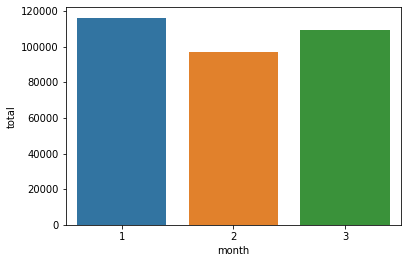

In [6]:
# 1) What was the best Month for sales?
df['month']=df['date'].apply(lambda x: x.split('/')[0]) 
ddf=df.groupby('month').sum()
sns.barplot(x=ddf.index, y=ddf['total'])

<AxesSubplot:xlabel='hour', ylabel='total'>

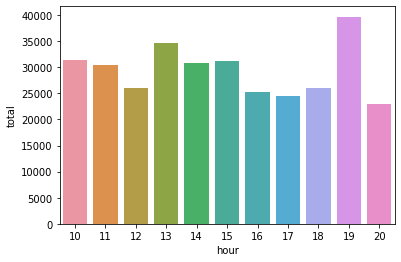

In [7]:
# 2) What was the best Time for sales?
df['hour']=pd.to_datetime(df['time']).dt.hour
ddf=df.groupby('hour').sum()
sns.barplot(x=ddf.index, y=ddf['total'])

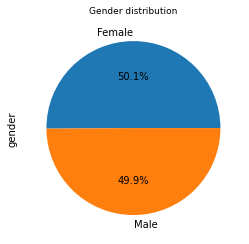

In [8]:
# 3) Which product line was ordered most often among men and women, 
# and what is the average total for each product line?
plt.figure(figsize=(5,4))
df['gender'].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title('Gender distribution', fontsize=9)
plt.show()

In [9]:
ddf=pd.pivot_table(df,index='gender', values='total', columns='product_line')
ddf

product_line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
gender,,,,,,
Female,322.643125,317.056250,368.565750,290.015414,380.213639,324.712739
Male,316.691965,291.079207,273.499125,348.099460,294.136241,340.360327


<AxesSubplot:xlabel='product_line', ylabel='gender'>

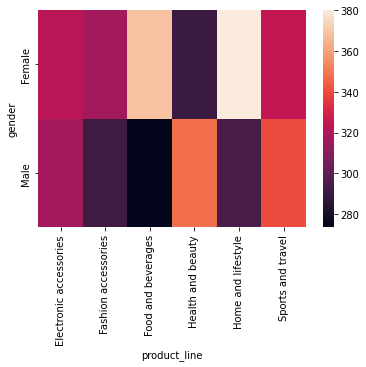

In [10]:
sns.heatmap(data=ddf)

<AxesSubplot:xlabel='product_line', ylabel='gender'>

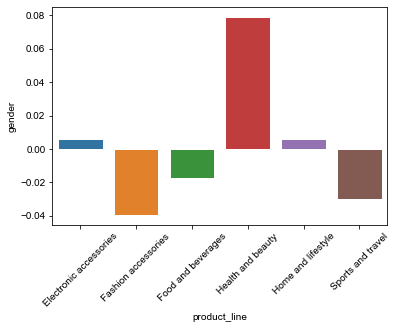

In [11]:
from sklearn.preprocessing import OrdinalEncoder 
ordinal_encoder = OrdinalEncoder()
feat=['gender']
df[feat] = ordinal_encoder.fit_transform(df[feat])
new_df=pd.pivot_table(df,index='product_line', values='gender')
new_df=new_df.gender.apply(lambda x: x-0.5)
plt.xticks(rotation=45)
sns.set_style("darkgrid")
sns.barplot(x=new_df.index, y=new_df)

# '0' stands for Female, '1' stands for Male
# So now we clearly see an interesting pattern: male tends to buy 'Health and beauty' products more often than female, 
# when female tends to buy 'Fashion accessories' and 'Sports and travel' products more often than male

In [12]:
# 4) Predict the Gross Income of the company
# To create our model we have to preprocess some features:

df['day'] = pd.to_datetime(df['date']).dt.day_name() 
feat=['branch','city','customer_type','product_line', 'month','hour','day']
df[feat] = ordinal_encoder.fit_transform(df[feat])

# branch: 0-A, 1-B, 2-C
# city: 0-Mandalay, 1-Naypyitaw, 2-Yangon
# customer_type: 0-Member, 1-Normal
# product_line: 0 - Electronic accessories, 1 - Fashion accessories, 2 - Food and beverages, 3 - Health and beauty, 
# 4 - Home and lifestyle, 5 - Sports and travel
# month: 1-3 for Jan,Feb,March
# hour: 0-10 for 10-20 hours
# day: 0-6 for day of week

df.drop(['invoice_id', 'tax_5%', 'date', 'time', 'payment'], axis = 1, inplace=True)

In [17]:
x = df[['branch','city','customer_type','gender','product_line','quantity','cogs','gross_margin_percentage', 'month', 'hour', 'day']]
y = df['gross_income']
# Exclude 'total' and 'unit_price' because they have a direct impact on the profit of the order

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size=0.3)

model_dt=DecisionTreeRegressor(random_state=1)
model_rf=RandomForestRegressor(random_state=1)
model_xgb=XGBRegressor()
model_dt.fit(x_train,y_train)
model_rf.fit(x_train,y_train)
model_xgb.fit(x_train,y_train)
# Let's create a function to ease the evaluation of our models:
def val_score(model):
    scores = cross_val_score(model, x_train, y_train, cv=5) 
    return scores.mean()

In [18]:
dt_score=val_score(model_dt)
print(dt_score)
rf_score=val_score(model_rf)
print(rf_score)
xgb_score=val_score(model_xgb)
print(xgb_score)

0.9997821578773134
0.9999165845978311
0.9997676082805199


In [19]:
# Use GridSearchCV for some parametr tuning

from sklearn.model_selection import GridSearchCV

# Make a dictionary of hyperparameter values to search

parametrs_dt = {
    "max_depth" : [1,5,10,13],
    "min_samples_leaf":[3,5,8,10,15],
    "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
    "max_leaf_nodes":[10,30,50,70,90] 
}

parametrs_rf = {
    "n_estimators" : [10, 50, 100],
    "max_depth" : [3, 6, 9],
}

parametrs_xgb = {  
    "n_estimators" : [100, 200, 500],
    "max_depth" : [3, 6, 9],
    "learning_rate" : [0.01, 0.1, 0.2]
}

In [20]:
# Make a GridSearchCV object

GS_dt = GridSearchCV(estimator = model_dt,
                  param_grid = parametrs_dt,
                  cv = 5,
                  verbose = 2)
GS_dt.fit(x_train,y_train)
print(GS_dt.best_params_, GS_dt.best_score_) 

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_lea

[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=15, min_weight_fraction_leaf=0.5; total time=   0.0s
[

[CV] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.1; total time=   0.0s
[

[CV] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.3; total time=   0.0s
[

[CV] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=8, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END m

[CV] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END m

[CV] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END m

[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END m

[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=15, min_weight_fraction_leaf=0.4; total time=   0.0s
[

[CV] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[

[CV] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, min_weight_fraction_leaf=0.2; total time=   0.0s
[

[CV] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END m

[CV] END max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5; total time=   0.0s
[

[CV] END max_depth=10, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.2; total time=   0.0s
[

[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5; total time=   0.0s
[

[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=50, min_samples_leaf=15, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=70, min_samples_leaf=3, min_weight_fraction_leaf=0.1; total time= 

[CV] END max_depth=10, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=70, min_samples_leaf=15, min_weight_fraction_leaf=0.3; total time=

[CV] END max_depth=10, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=90, min_samples_leaf=10, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=90, min_samples_leaf=15, min_weight_fraction_leaf=0.1; total time=

[CV] END max_depth=13, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.1; total time=   0.0

[CV] END max_depth=13, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.4; total time=   0.0s
[

[CV] END max_depth=13, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=50, min_samples_leaf=8, min_weight_fraction_leaf=0.1; total time=   0.0s
[

[CV] END max_depth=13, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.3; total time=   0.0s
[

[CV] END max_depth=13, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.2; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.4; total time=   0.0s
[

In [21]:
GS_rf = GridSearchCV(estimator = model_rf,
                  param_grid = parametrs_rf,
                  cv = 5,
                  verbose = 4)
GS_rf.fit(x_train,y_train)
print(GS_rf.best_params_, GS_rf.best_score_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......max_depth=3, n_estimators=10;, score=0.988 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=10;, score=0.988 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=10;, score=0.993 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=10;, score=0.989 total time=   0.0s
[CV 5/5] END ......max_depth=3, n_estimators=10;, score=0.991 total time=   0.0s
[CV 1/5] END ......max_depth=3, n_estimators=50;, score=0.990 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=50;, score=0.990 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=50;, score=0.993 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=50;, score=0.990 total time=   0.0s
[CV 5/5] END ......max_depth=3, n_estimators=50;, score=0.991 total time=   0.0s
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.991 total time=   0.0s
[CV 2/5] END .....max_depth=3, n_estimators=100;,

In [22]:
GS_xgb = GridSearchCV(estimator = model_xgb,
                  param_grid = parametrs_xgb,
                  cv = 5,
                  verbose = 4)
GS_xgb.fit(x_train,y_train)
print(GS_xgb.best_params_, GS_xgb.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.620 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.650 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.614 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.621 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.613 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.942 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.952 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.944 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.945 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.9

[CV 2/5] END learning_rate=0.1, max_depth=9, n_estimators=500;, score=1.000 total time=   0.5s
[CV 3/5] END learning_rate=0.1, max_depth=9, n_estimators=500;, score=1.000 total time=   0.5s
[CV 4/5] END learning_rate=0.1, max_depth=9, n_estimators=500;, score=1.000 total time=   0.6s
[CV 5/5] END learning_rate=0.1, max_depth=9, n_estimators=500;, score=1.000 total time=   0.6s
[CV 1/5] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=1.000 total time=   0.0s
[CV 1/5] END learning_rate=0.2, max_depth=3, n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5] END learning_rate=0.2, max_depth=3, n_est

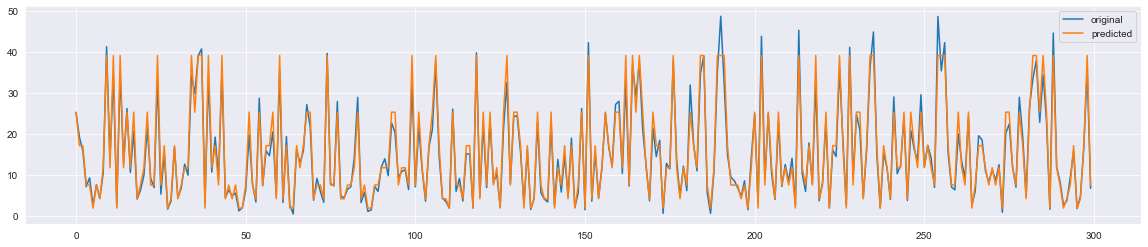

5.697545359151648


In [24]:
# DecisionTreeRegressor prediction chart & MSE

model_dt=DecisionTreeRegressor(random_state=1, max_depth=5, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1)
model_dt.fit(x_train,y_train)
y_pred_dt=model_dt.predict(x_test)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_dt, label="predicted")
plt.legend()
plt.rcParams["figure.figsize"] = (20,4)
plt.show()
mse_dt=mean_squared_error(y_test, y_pred_dt)
print(mse_dt)

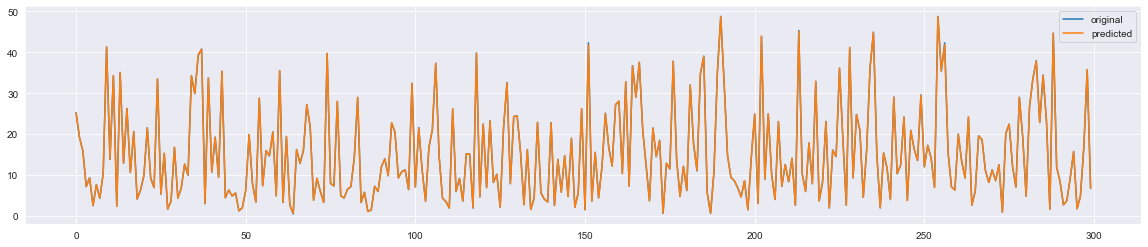

0.004127464172781559


In [25]:
# RandomForestRegressor prediction chart & MSE

model_rf=RandomForestRegressor(random_state=1, max_depth=9, n_estimators=100)
model_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_rf, label="predicted")
plt.legend()
plt.show()
mse_rf=mean_squared_error(y_test, y_pred_rf)
print(mse_rf)

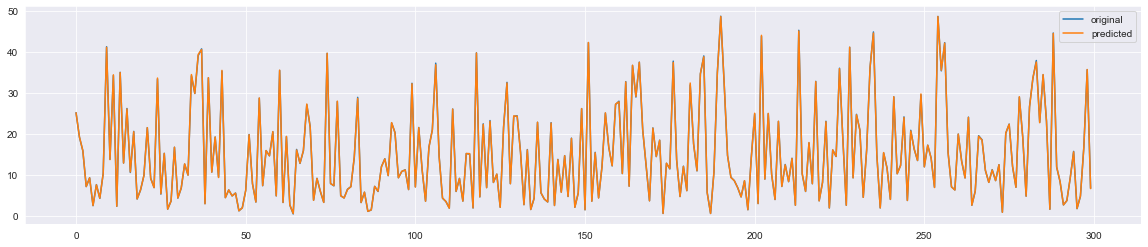

0.00760587115677079


In [26]:
# XGBRegressor prediction chart & MSE

model_xgb=XGBRegressor(random_state=1, learning_rate=0.1, max_depth=6, n_estimators=500)
model_xgb.fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_xgb, label="predicted")
plt.legend()
plt.show()
mse_xgb=mean_squared_error(y_test, y_pred_xgb)
print(mse_xgb)

In [27]:
print('MSE for DecisionTreeRegressor model: {}'.format(mse_dt))
print('MSE for RandomForestRegressor model: {}'.format(mse_rf))
print('MSE for XGBRegressor model: {}'.format(mse_xgb))

MSE for DecisionTreeRegressor model: 5.697545359151648
MSE for RandomForestRegressor model: 0.004127464172781559
MSE for XGBRegressor model: 0.00760587115677079
